# Construct a Binary Tree from Preorder and Inorder Traversal

Given two integer arrays `preorder` and `inorder` where `preorder` is the preorder traversal of a binary tree and `inorder` is the inorder traversal of the same tree, construct and return the binary tree.

#### Example 1:

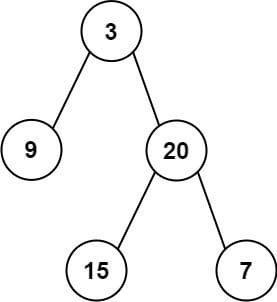

```bash
Input: preorder = [3,9,20,15,7], inorder = [9,3,15,20,7]
Output: [3,9,20,null,null,15,7]
```

#### Example 2:

```bash
Input: preorder = [-1], inorder = [-1]
Output: [-1]
```

## Solution

To construct a binary tree from preorder and inorder traversal, we'll use a *recursive approach*.

The first element in preorder traversal is always the root. We can find this element's position in inorder traversal to determine which elements belonging to left subtree and which belong to right subtree.

For each recursive call, we'll create a new node, recursively construct its left and right subtrees using the corresponding portions of preorder and inorder arrays.

We'll use a hashmap to store indices of elements in inorder traversal for `O(1)` lookup.
This makes the time complexity `O(n)`, where `n` is the number of nodes in the tree.

In [ ]:
def build_tree(preorder, inorder):
    # Create a hashmap for inorder indices
    inorder_map = {val: id for idx, val in enumerate(inorder)} # For each (idx, val) -> val becomes the key and idx becomes the value
    
    def helper(pre_start, pre_end, in_start, in_end):
        # Base case: invalid range
        if pre_start > pre_end:
            return None
        
        # Create root node from first element of preorder
        root = TreeNode(preorder[pre_start])

        # Find position of root in inorder
        root_idx = inorder_map[root.val]

        # Calculate size of left subtree
        left_size = root_idx - in_start

        # Recursively construct left and right subtree
        root.left = helper(pre_start + 1,
                            pre_start + left_size,
                            in_start,
                            root_idx -1)
        root.right = helper(pre_start + left_size + 1,
                            pre_end,
                            root_idx + 1,
                            in_end)
        return root
    
    return helper(0, len(preorder) - 1, 0, len(inorder) - 1)